In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from halp import undirected_hypergraph
from halp.utilities import undirected_graph_transformations, undirected_matrices

## Incidence and Adjacency Matrix

### Type 1

In [28]:
H = undirected_hypergraph.UndirectedHypergraph()
H.add_nodes(["A", "B", "C", "D"])
H.add_hyperedge(["A", "B", "C"])
H.add_hyperedge(["C", "D"])

'e2'

In [29]:
G = undirected_hypergraph.UndirectedHypergraph()

nodes = [(node, H.get_node_attributes(node_attributes))
         for node in G.node_iterator()]
G.add_nodes(nodes)

edges = [(node_a, node_b)
         for hyperedge_id in H.hyperedge_id_iterator()
         for node_a in H.get_hyperedge_nodes(hyperedge_id)
         for node_b in H.get_hyperedge_nodes(hyperedge_id)
         if node_a != node_b]

G.add_hyperedges(edges)

['e1', 'e2', 'e1', 'e3', 'e2', 'e3', 'e4', 'e4']

In [20]:
G = undirected_graph_transformations.to_graph_decomposition(H)

In [33]:
nx_graph = nx.Graph()

for node in G.node_iterator():
    nx_graph.add_node(node)

for hyperedge_id in G.hyperedge_id_iterator():
    edge_nodes = G.get_hyperedge_nodes(hyperedge_id)
    edge_attributes = G.get_hyperedge_attributes(hyperedge_id)
    nx_graph.add_edge(edge_nodes[0], edge_nodes[1])

In [34]:
nx.adj_matrix(nx_graph).toarray()

array([[0, 1, 1, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 1],
       [0, 0, 1, 0]], dtype=int32)

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


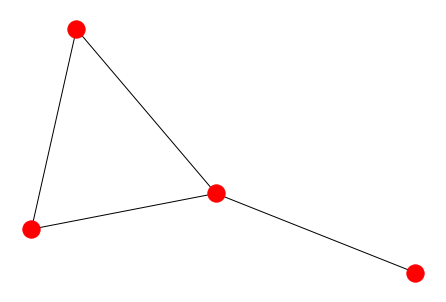

In [35]:
nx.draw(nx_graph)

### Type 2

In [36]:
H = undirected_hypergraph.UndirectedHypergraph()
H.add_nodes(["A", "B", "C", "D"])
H.add_hyperedge(["A", "B", "C"])
H.add_hyperedge(["C", "D"])

'e2'

In [55]:
edge_map = undirected_matrices.get_hyperedge_id_mapping(H)[1]
node_map = undirected_matrices.get_node_mapping(H)[1]

In [56]:
node_map

{'A': 0, 'B': 1, 'D': 2, 'C': 3}

In [57]:
I = undirected_matrices.get_incidence_matrix(H, node_map, edge_map)

In [58]:
I.toarray()
A = I.dot(I.T).toarray()
A = A - np.diag(np.diag(A))

In [59]:
A

array([[0, 1, 0, 1],
       [1, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 1, 1, 0]], dtype=int32)

In [60]:
nx_graph = nx.from_numpy_matrix(A)

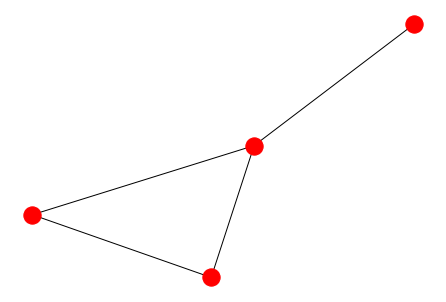

In [61]:
nx.draw(nx_graph)

### More Complex Graph

In [62]:
from networkx.algorithms import bipartite
g  = nx.Graph()
g.add_nodes_from(['a', 'b', 'c','d','e'], bipartite = 1)
g.add_nodes_from(list(range(6, 137)), bipartite = 0)
mapped = ['a', 'b', 'c','d','e']

In [63]:
with open("../data/brunson_revolution/out.brunson_revolution_revolution", 'rt') as f:
    lines = [line.rstrip(' \n') for line in f] 

In [64]:
edges = []

for entry in lines:
    node_2 = mapped[int(entry[-1]) - 1]
    node_1 = int(entry[:-2])
    edges.append((node_1, node_2))

In [65]:
g.add_edges_from(edges)

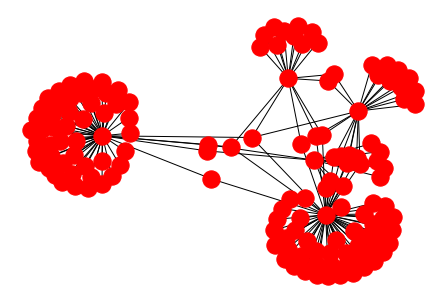

In [66]:
nx.draw(g)

In [67]:
bottom_nodes, top_nodes = bipartite.sets(g)

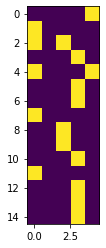

In [68]:
plt.imshow(bipartite.biadjacency_matrix(g, row_order = list(range(6, 137)), column_order= ["a", "b", "c", "d", "e"]).toarray()[:15])

In [69]:
test = bipartite.biadjacency_matrix(g, row_order = list(range(6, 137)), column_order= ["a", "b", "c", "d", "e"]).toarray()[:100]

In [72]:
# read biadjacency matrix to hypergraph
H = undirected_hypergraph.UndirectedHypergraph()
H.add_nodes(list(range(0, 100)))

for col in range(len(test[0])):
    # iterating through the hyperedges
    # find the non-zero elements => nodes in the hyperedge
    nodes_in_h_edge = list(np.nonzero(test[:,col])[0])
    if len(nodes_in_h_edge) == 0:
        pass
    else:
        H.add_hyperedge(nodes_in_h_edge)

### Type 1

In [82]:
G = undirected_graph_transformations.to_graph_decomposition(H)

In [83]:
nx_graph = nx.Graph()

for node in G.node_iterator():
    nx_graph.add_node(node)

for hyperedge_id in G.hyperedge_id_iterator():
    edge_nodes = G.get_hyperedge_nodes(hyperedge_id)
    edge_attributes = G.get_hyperedge_attributes(hyperedge_id)
    nx_graph.add_edge(edge_nodes[0], edge_nodes[1])

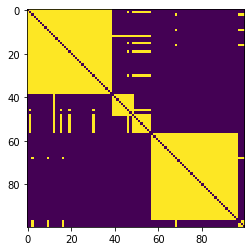

In [84]:
plt.imshow(nx.adj_matrix(nx_graph).toarray())

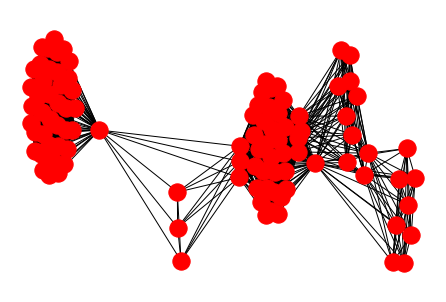

In [89]:
nx.draw(nx_graph)

### Type 2

In [106]:
node_map = undirected_matrices.get_node_mapping(H)[1]
edge_map = undirected_matrices.get_hyperedge_id_mapping(H)[1]

In [107]:
edge_map

{'e1': 0, 'e2': 1, 'e3': 2, 'e4': 3, 'e5': 4}

In [108]:
I = undirected_matrices.get_incidence_matrix(H, node_map, edge_map)
np.shape(I)

(100, 5)

In [109]:
A = I.dot(I.T)
A = A -np.diag(np.diag(A.toarray()))

In [110]:
nx_graph = nx.from_numpy_matrix(A)

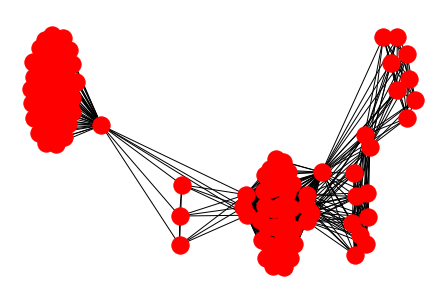

In [127]:
nx.draw(nx_graph)

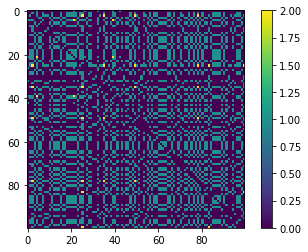

In [105]:
plt.imshow(A)
plt.colorbar()

In [99]:
# uncertain as to which is right

In [100]:
# Hyperedges Matrix
C = I.T.dot(I)

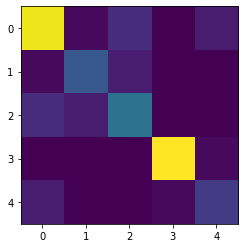

In [102]:
plt.imshow(C.toarray())

In [104]:
he_deg = np.diag(np.diag(C.toarray()))